In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import seaborn as sns

sns.set_style('darkgrid')
plt.rc('font', family='NanumGothic')

Mounted at /content/drive


In [83]:
loan_result = pd.read_csv('/content/drive/MyDrive/13. 빅콘테스트 2022/data/loan_result.csv')
#user_spec = pd.read_csv('/content/drive/MyDrive/13. 빅콘테스트 2022/data/user_spec.csv')
user_spec = pd.read_csv('/content/drive/MyDrive/13. 빅콘테스트 2022/data/user_spec_fbfill.csv')  # ffill, bfill
user_spec = user_spec.sort_values(['user_id','insert_time']) # 데이터 정렬 

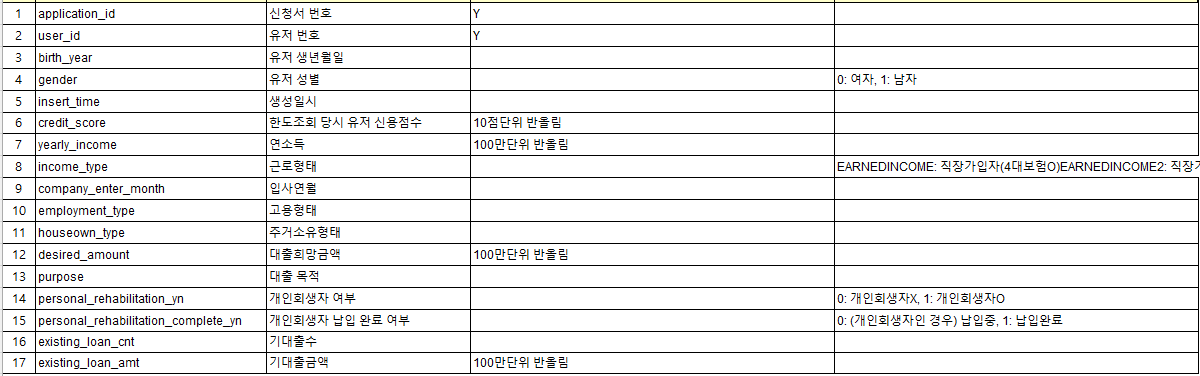

# 결측치


In [ ]:
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

- birth_year, gender 동일 행에 결측치 존재

In [ ]:
user_spec[user_spec.birth_year.isna()].isna().sum()

application_id                             0
user_id                                    0
birth_year                             12961
gender                                 12961
insert_time                                0
credit_score                            1718
yearly_income                              2
income_type                                2
company_enter_month                     2954
employment_type                            2
houseown_type                              2
desired_amount                             2
purpose                                    2
personal_rehabilitation_yn              4834
personal_rehabilitation_complete_yn    10525
existing_loan_cnt                       5245
existing_loan_amt                       6137
dtype: int64

- 동일 행에 결측치 존재

In [ ]:
user_spec[user_spec.income_type.isna()].isna().sum()

application_id                          0
user_id                                 0
birth_year                              2
gender                                  2
insert_time                             0
credit_score                            3
yearly_income                          85
income_type                            85
company_enter_month                    85
employment_type                        85
houseown_type                          85
desired_amount                         85
purpose                                85
personal_rehabilitation_yn             85
personal_rehabilitation_complete_yn    85
existing_loan_cnt                      16
existing_loan_amt                      22
dtype: int64

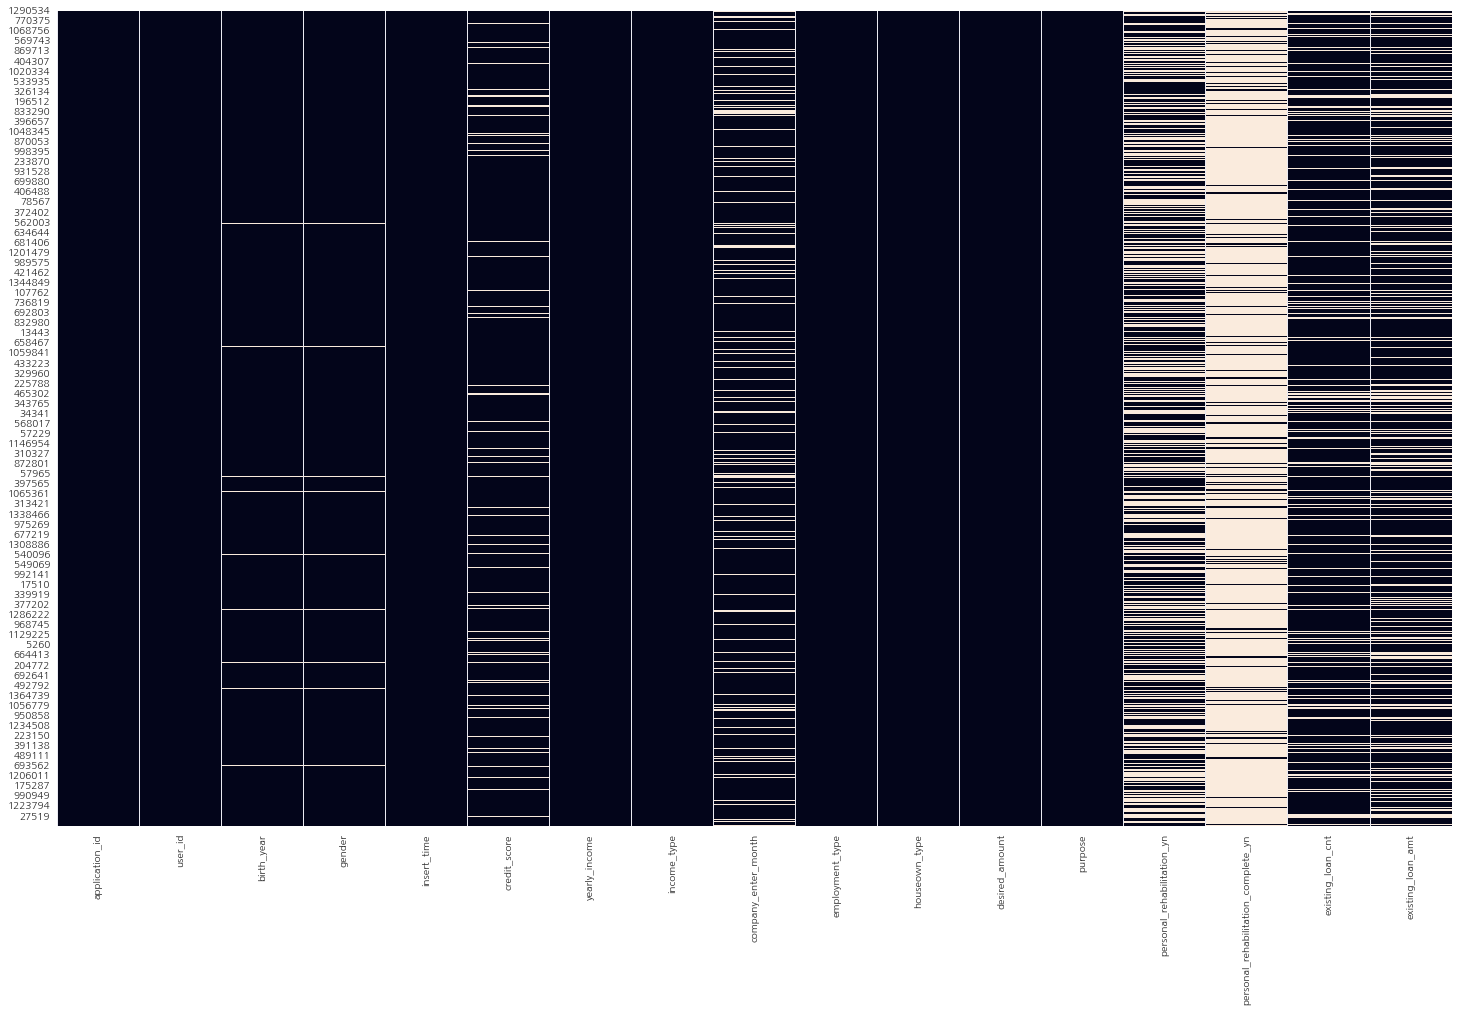

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(user_spec.isna(), cbar=False)

# 이전 값으로 보간 
- 다음과 같이 중간에 비워진 데이터 존재

In [ ]:
user_spec[user_spec.user_id == 135984].sort_values('insert_time')

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
98143,922622,135984,1974.0,1.0,2022-05-24 20:33:58,720.0,16000000.0,EARNEDINCOME,202004.0,계약직,자가,20000000.0,대환대출,0.0,NaN,4.0,67000000.0
543488,1975721,135984,1974.0,1.0,2022-05-28 21:37:10,720.0,16000000.0,EARNEDINCOME,202004.0,계약직,자가,30000000.0,대환대출,0.0,NaN,4.0,67000000.0
1173097,1200717,135984,1974.0,1.0,2022-05-31 20:30:00,720.0,16000000.0,EARNEDINCOME,202004.0,계약직,자가,40000000.0,대환대출,0.0,NaN,4.0,67000000.0
4746,1277138,135984,1974.0,1.0,2022-06-03 18:25:20,720.0,16000000.0,EARNEDINCOME,20200401.0,계약직,자가,30000000.0,대환대출,0.0,NaN,4.0,67000000.0
1177874,195679,135984,1974.0,1.0,2022-06-05 22:43:40,720.0,16000000.0,EARNEDINCOME,20200401.0,계약직,자가,20000000.0,대환대출,0.0,NaN,4.0,67000000.0
531933,1705381,135984,1974.0,1.0,2022-06-12 18:20:24,750.0,16000000.0,EARNEDINCOME,20200401.0,계약직,자가,30000000.0,대환대출,0.0,NaN,4.0,67000000.0
1222019,1796797,135984,1974.0,1.0,2022-06-13 18:25:41,750.0,16000000.0,EARNEDINCOME,20200401.0,계약직,자가,20000000.0,대환대출,0.0,NaN,4.0,67000000.0
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0
546172,1551269,135984,1974.0,1.0,2022-06-16 20:47:02,740.0,16000000.0,EARNEDINCOME,20200401.0,계약직,자가,25000000.0,대환대출,0.0,NaN,4.0,67000000.0
1185884,403286,135984,1974.0,1.0,2022-06-22 23:28:43,740.0,16000000.0,EARNEDINCOME,20200401.0,계약직,자가,35000000.0,대환대출,0.0,NaN,4.0,67000000.0


In [ ]:
from tqdm import tqdm

ndf = []
for idx, df in tqdm(user_spec.groupby('user_id')):
  ndf.append(df.fillna(method='ffill'))

user_spec = pd.concat(ndf, axis = 0, ignore_index=True)

100%|██████████| 405213/405213 [05:14<00:00, 1287.07it/s]


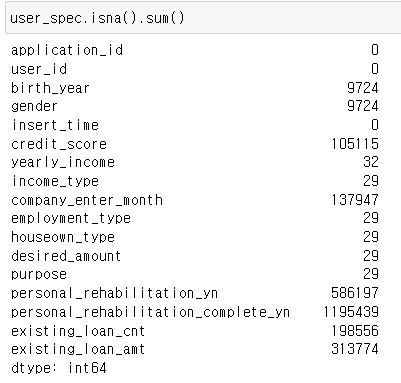

# 같은 날의 결측치 이후 값 채우기 

In [ ]:
user_spec['ymd'] = user_spec['insert_time'].str[0:10] # 전처리를 위한 년월일 변수 

In [ ]:
user_spec[user_spec.user_id == 827892]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,ymd
1312596,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0,2022-06-16
1312597,1127034,827892,1993.0,1.0,2022-06-16 16:31:48,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0,2022-06-16
1312598,872487,827892,1993.0,1.0,2022-06-16 16:34:51,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0,2022-06-16
1312599,1969398,827892,1993.0,1.0,2022-06-16 16:36:25,940.0,60000000.0,EARNEDINCOME,20190701.0,정규직,기타가족소유,100000000.0,생활비,0.0,NaN,3.0,61000000.0,2022-06-16


In [ ]:
from tqdm import tqdm

ndf = []
for idx, df in tqdm(user_spec.groupby(['user_id','ymd'])):
  ndf.append(df.fillna(method='bfill'))

user_spec = pd.concat(ndf, axis = 0, ignore_index=True)

100%|██████████| 1244501/1244501 [19:54<00:00, 1042.06it/s]


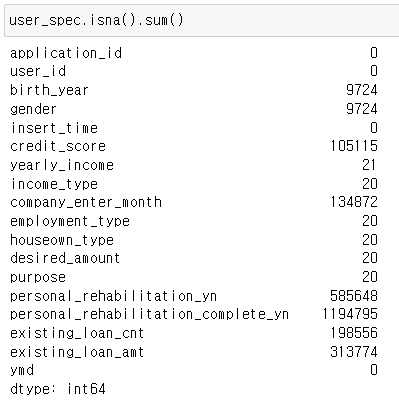

# 나이, 나이대 파생 변수 생성 

In [ ]:
user_spec['age'] = 2022 - user_spec['birth_year'] + 1

def f_age(x):
  if np.isnan(x): return np.nan
  elif x < 20: return '10s'
  elif x < 30: return '20s'
  elif x < 40: return '30s'
  elif x < 50: return '40s'
  elif x < 60: return '50s'
  elif x < 70: return '60s'
  else: return '70s'

user_spec['age_range'] = user_spec['age'].apply(f_age)

In [ ]:
user_spec.age_range.unique()

array(['20s', '30s', '50s', '40s', '60s', nan, '70s', '10s'], dtype=object)

# birth_year, gender NA
- 30대의 분포와 가장 비슷?

In [ ]:
df_na = user_spec[user_spec.birth_year.isna()]

<Figure size 1800x2520 with 0 Axes>

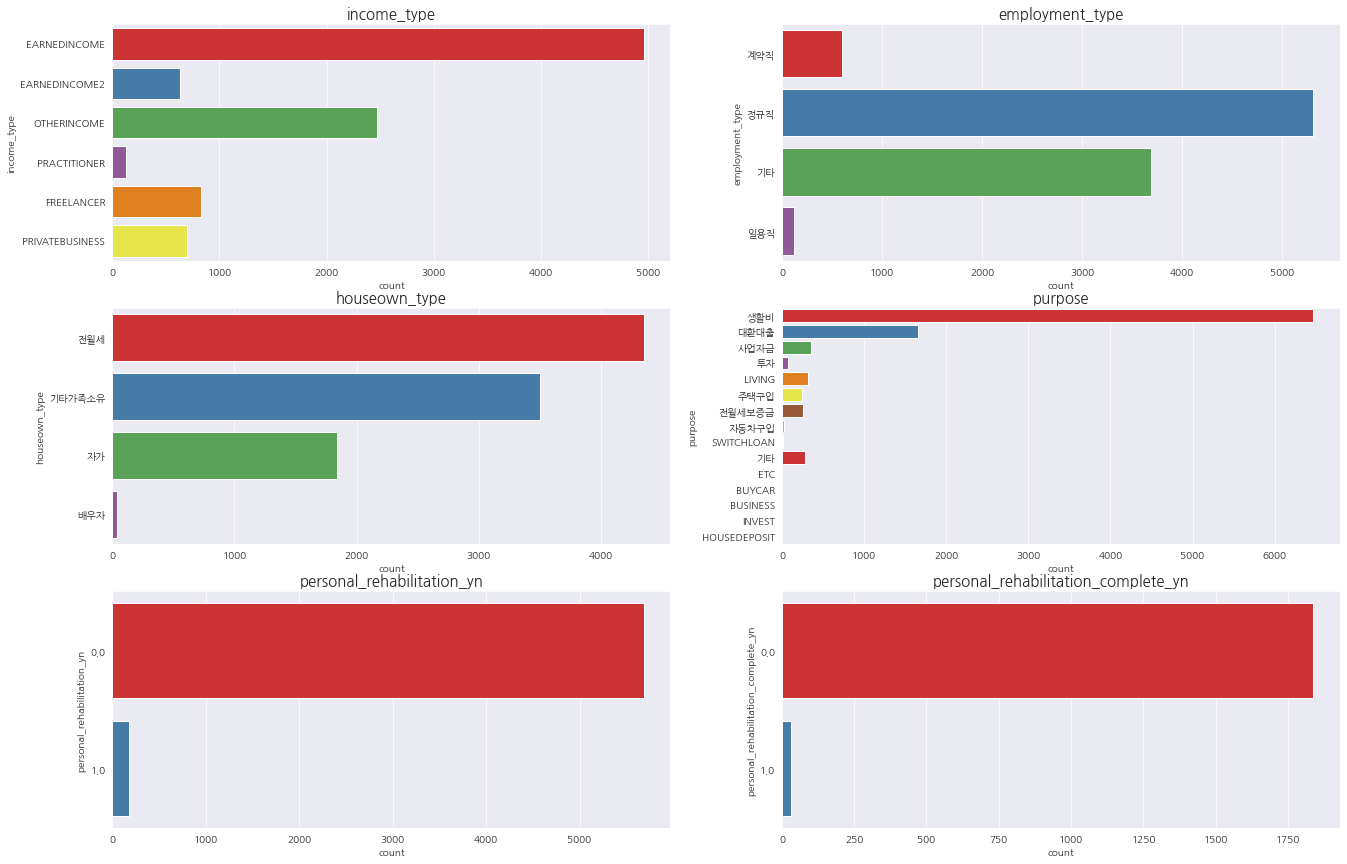

In [ ]:
col_list = ['income_type', 'employment_type', 'houseown_type', 'purpose', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn']

plt.figure(figsize=(25, 35)) # 가로, 세로 

fig = plt.figure(figsize=(22, 20))   

for i in range(len(col_list)):
  col = col_list[i]

  ax = fig.add_subplot(4, 2, i+1)
  sns.countplot(y=col, palette='Set1', data=df_na, ax=ax)
  plt.title(col, fontsize=15)

# credit_score NA

In [ ]:
df_na = user_spec[user_spec.credit_score.isna()]

<Figure size 1800x2520 with 0 Axes>

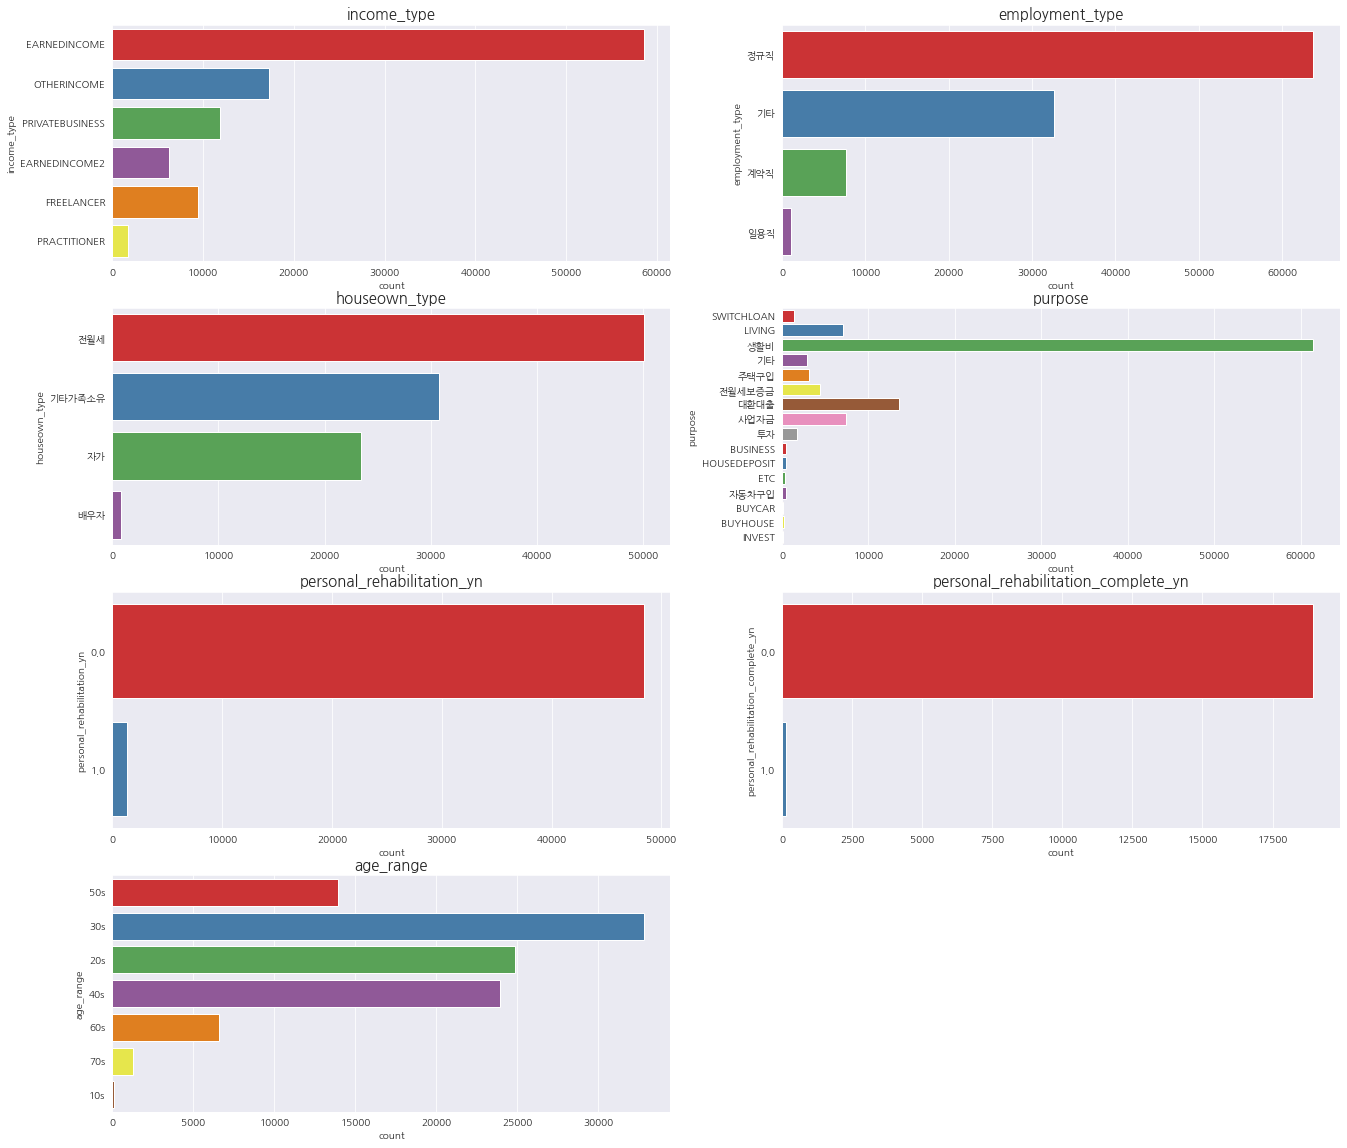

In [ ]:
col_list = ['income_type', 'employment_type', 'houseown_type', 'purpose', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'age_range']

plt.figure(figsize=(25, 35)) # 가로, 세로 

fig = plt.figure(figsize=(22, 20))   

for i in range(len(col_list)):
  col = col_list[i]

  ax = fig.add_subplot(4, 2, i+1)
  sns.countplot(y=col, palette='Set1', data=df_na, ax=ax)
  plt.title(col, fontsize=15)

# yearly_income

- loan_result에 존재하지 않는 application_id 
- 해당 행 제거

In [ ]:
df_na = user_spec[user_spec.yearly_income.isna()]

In [ ]:
df_na

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,ymd,age,age_range
32796,1862054,21121,1993.0,0.0,2022-04-18 20:14:41,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-18,30.0,30s
32797,1112045,21121,1993.0,0.0,2022-04-25 07:43:32,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-25,30.0,30s
32798,680297,21121,1993.0,0.0,2022-04-25 07:44:33,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-25,30.0,30s
189143,449033,118147,1998.0,0.0,2022-06-16 16:29:37,560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-16,25.0,20s
189144,1223986,118147,1998.0,0.0,2022-06-16 16:33:02,560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-16,25.0,20s
225858,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-16,47.0,40s
225859,1991124,142003,1976.0,0.0,2022-06-16 16:30:17,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-16,47.0,40s
225860,891191,142003,1976.0,0.0,2022-06-16 16:31:24,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-16,47.0,40s
228601,717987,143869,1966.0,0.0,2022-06-16 16:30:38,840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,38000000.0,2022-06-16,57.0,50s
228602,1843150,143869,1966.0,0.0,2022-06-16 16:31:39,840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,38000000.0,2022-06-16,57.0,50s


In [ ]:
application_id_list = df_na.application_id.unique()

for application_id in application_id_list:
  loan_result_len = len(loan_result[loan_result.application_id == application_id])
  print('application_id: ', application_id, ' loan_result length: ', loan_result_len)

application_id:  1862054  loan_result length:  0
application_id:  1112045  loan_result length:  0
application_id:  680297  loan_result length:  0
application_id:  449033  loan_result length:  0
application_id:  1223986  loan_result length:  0
application_id:  1068316  loan_result length:  0
application_id:  1991124  loan_result length:  0
application_id:  891191  loan_result length:  0
application_id:  717987  loan_result length:  0
application_id:  1843150  loan_result length:  0
application_id:  1468193  loan_result length:  0
application_id:  108081  loan_result length:  0
application_id:  1860326  loan_result length:  0
application_id:  175411  loan_result length:  0
application_id:  2135078  loan_result length:  0
application_id:  450732  loan_result length:  0
application_id:  1284387  loan_result length:  0
application_id:  1923997  loan_result length:  0
application_id:  1425120  loan_result length:  0
application_id:  1979233  loan_result length:  0
application_id:  1026915  l

In [84]:
user_spec = user_spec.dropna(subset=['yearly_income']) # yearly_income 결측값인 행 제거 

In [85]:
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                                9723
gender                                    9723
insert_time                                  0
credit_score                            105114
yearly_income                                0
income_type                                  0
company_enter_month                     134851
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              585628
personal_rehabilitation_complete_yn    1194775
existing_loan_cnt                       198546
existing_loan_amt                       313764
ymd                                          0
dtype: int64

# company_enter_month 

- company_enter_month의 포멧이 yyyymm 또는 yyyymmdd으로 두가지 존재 
- yyyymmdd를 yyyymm로 변경

In [ ]:
user_spec[user_spec.user_id == 10768].sort_values('insert_time')

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,ymd,age,age_range
16541,723989,10768,1993.0,0.0,2022-03-01 19:54:10,610.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,50000000.0,대환대출,NaN,NaN,1.0,NaN,2022-03-01,30.0,30s
16542,971974,10768,1993.0,0.0,2022-03-03 18:27:46,610.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,39000000.0,대환대출,NaN,NaN,1.0,NaN,2022-03-03,30.0,30s
16543,130951,10768,1993.0,0.0,2022-03-03 20:03:07,610.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,50000000.0,대환대출,NaN,NaN,1.0,NaN,2022-03-03,30.0,30s
16544,1882361,10768,1993.0,0.0,2022-03-13 20:57:57,590.0,39000000.0,EARNEDINCOME,202108.0,정규직,전월세,50000000.0,대환대출,NaN,NaN,1.0,NaN,2022-03-13,30.0,30s
16545,828671,10768,1993.0,0.0,2022-04-01 16:19:27,580.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,50000000.0,대환대출,NaN,NaN,1.0,NaN,2022-04-01,30.0,30s
16546,323110,10768,1993.0,0.0,2022-05-05 13:51:54,590.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,60000000.0,대환대출,0.0,0.0,1.0,NaN,2022-05-05,30.0,30s
16547,1697635,10768,1993.0,0.0,2022-05-07 13:31:50,590.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,20000000.0,대환대출,0.0,0.0,1.0,NaN,2022-05-07,30.0,30s
16548,1661442,10768,1993.0,0.0,2022-05-20 15:59:41,590.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,50000000.0,대환대출,0.0,0.0,1.0,NaN,2022-05-20,30.0,30s
16549,1394760,10768,1993.0,0.0,2022-05-29 00:54:52,590.0,39000000.0,EARNEDINCOME,202202.0,정규직,전월세,39000000.0,생활비,0.0,0.0,1.0,NaN,2022-05-29,30.0,30s
16550,237405,10768,1993.0,0.0,2022-06-06 22:00:19,590.0,39000000.0,EARNEDINCOME,20220201.0,정규직,전월세,39000000.0,대환대출,0.0,0.0,1.0,NaN,2022-06-06,30.0,30s


In [86]:
user_spec['company_enter_month'] = user_spec['company_enter_month'].astype(str).apply(lambda x: float(x[0:6])) # yyyymmdd를 yyyymm로 변경

- employment_type이 기타인 값이 많았음
- employment_type이 기타이면서 income_type이 'OTHERINCOME', 'PRIVATEBUSINESS' 인 경우 의미있는 결측치로 볼지? 
- employment_type이 정규직이면서 income_type이 'OTHERINCOME', 'EARNEDINCOME' 인 경우 의미있는 결측치로 볼지? 

In [ ]:
df_na = user_spec[user_spec.company_enter_month.isna()]

In [ ]:
df_na.isna().sum()

application_id                              0
user_id                                     0
birth_year                               2255
gender                                   2255
insert_time                                 0
credit_score                            15988
yearly_income                               0
income_type                                 0
company_enter_month                    134851
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn              57601
personal_rehabilitation_complete_yn    117476
existing_loan_cnt                       26892
existing_loan_amt                       40308
ymd                                         0
age                                      2255
age_range                                2255
dtype: int64

<Figure size 1800x2520 with 0 Axes>

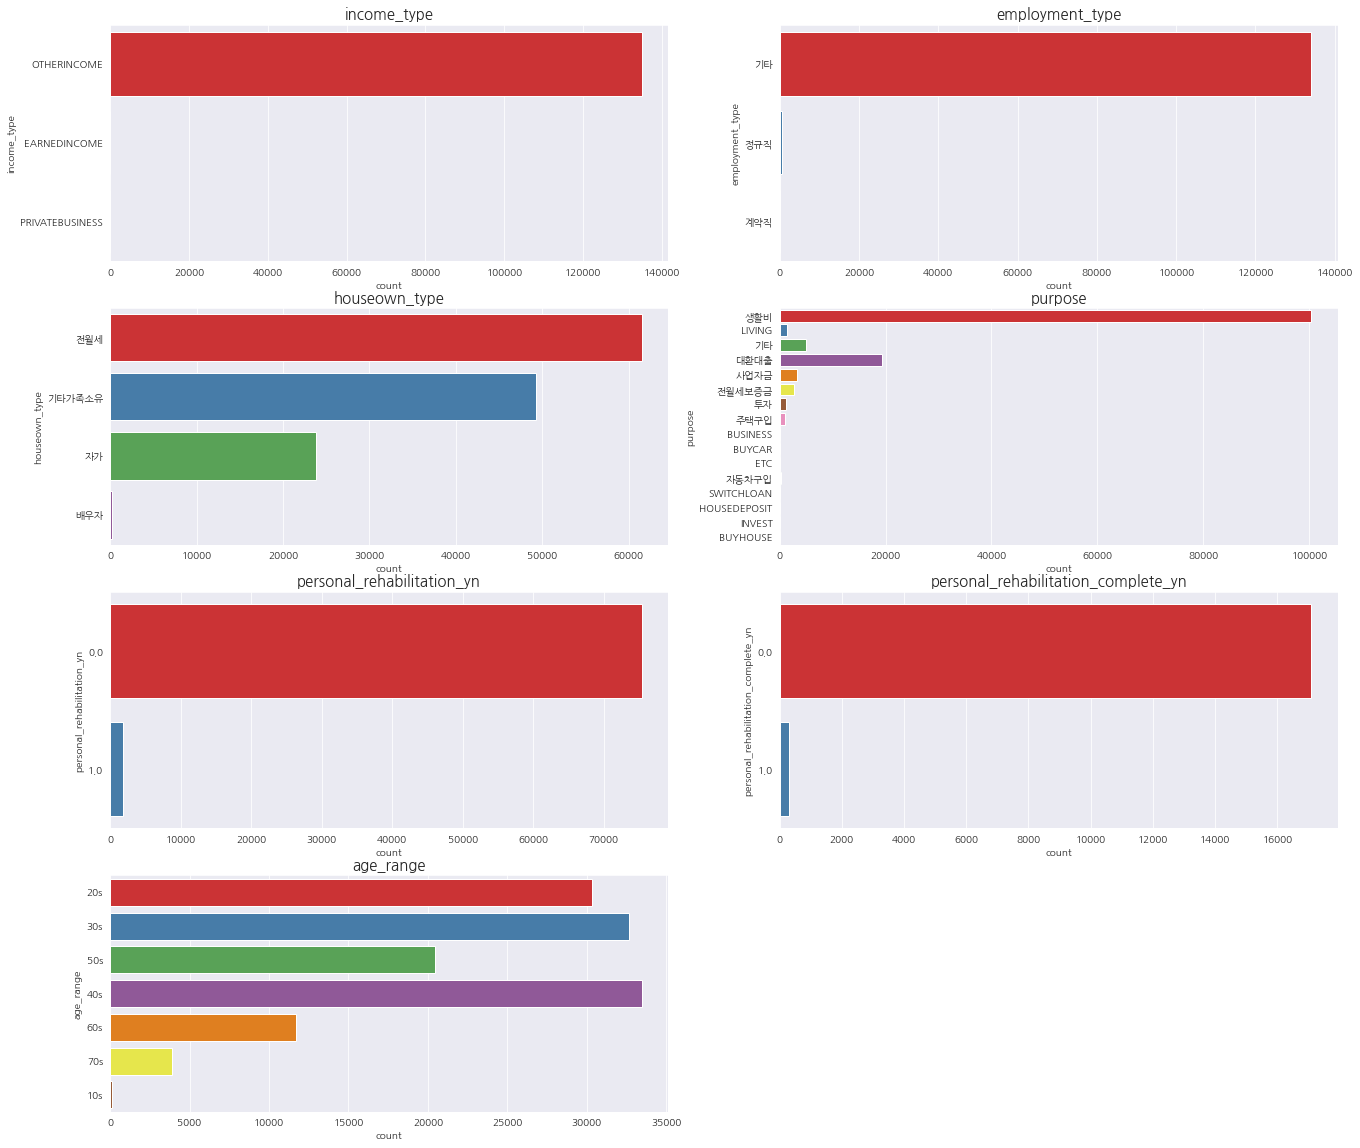

In [ ]:
col_list = ['income_type', 'employment_type', 'houseown_type', 'purpose', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'age_range']

plt.figure(figsize=(25, 35)) # 가로, 세로 

fig = plt.figure(figsize=(22, 20))   

for i in range(len(col_list)):
  col = col_list[i]

  ax = fig.add_subplot(4, 2, i+1)
  sns.countplot(y=col, palette='Set1', data=df_na, ax=ax)
  plt.title(col, fontsize=15)

In [ ]:
df_na[df_na.employment_type == '정규직'].income_type.unique()

array(['OTHERINCOME', 'EARNEDINCOME'], dtype=object)

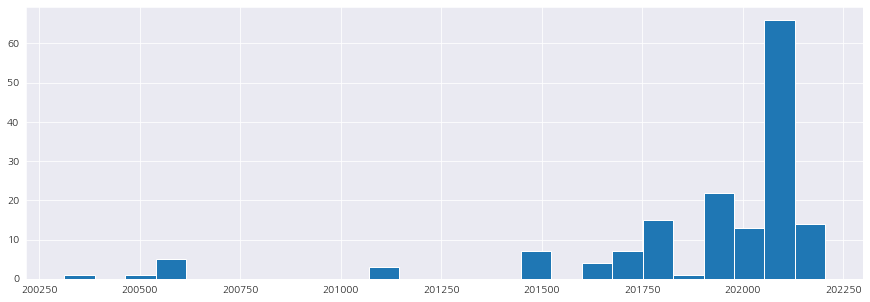

In [ ]:
x = user_spec[(user_spec.employment_type == '정규직')&(user_spec.income_type == 'OTHERINCOME')]
plt.figure(figsize=(15, 5)) # 가로, 세로 
plt.hist(x['company_enter_month'], bins = 25)
plt.show()

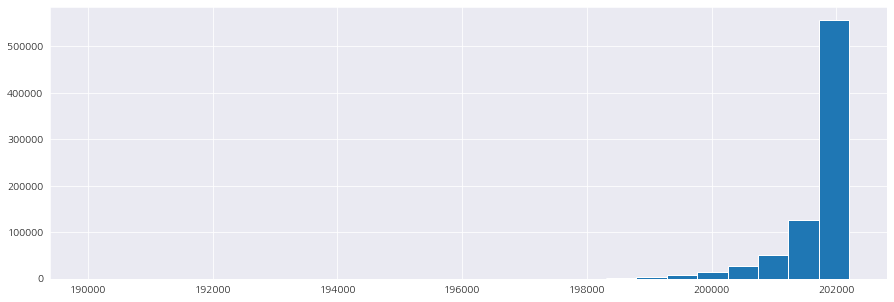

In [ ]:
x = user_spec[(user_spec.employment_type == '정규직')&(user_spec.income_type == 'EARNEDINCOME')]
plt.figure(figsize=(15, 5)) # 가로, 세로 
plt.hist(x['company_enter_month'], bins = 25)
plt.show()

In [ ]:
df_na[df_na.employment_type == '기타'].income_type.unique()

array(['OTHERINCOME', 'PRIVATEBUSINESS'], dtype=object)

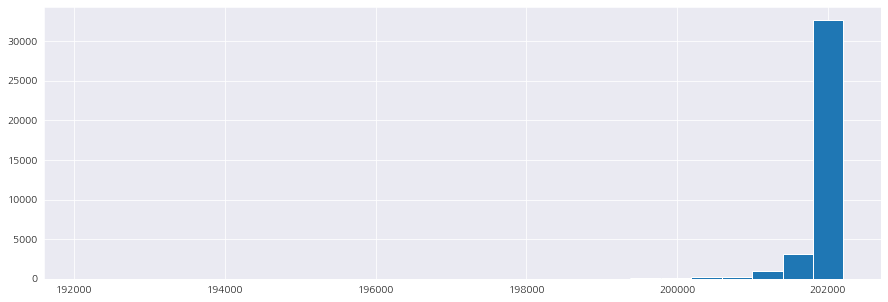

In [ ]:
x = user_spec[(user_spec.employment_type == '기타')&(user_spec.income_type == 'OTHERINCOME')]
plt.figure(figsize=(15, 5)) # 가로, 세로 
plt.hist(x['company_enter_month'], bins = 25)
plt.show()

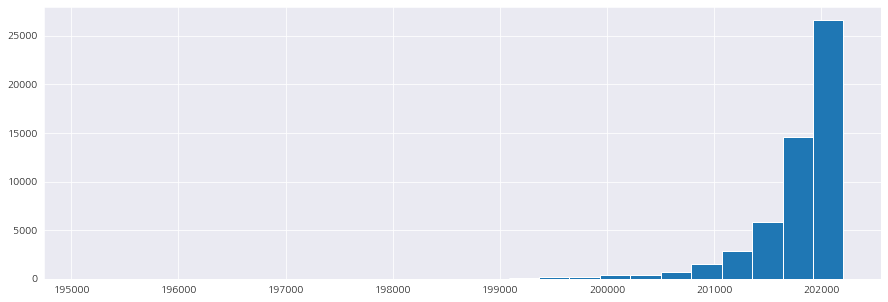

In [ ]:
x = user_spec[(user_spec.employment_type == '기타')&(user_spec.income_type == 'PRIVATEBUSINESS')]
plt.figure(figsize=(15, 5)) # 가로, 세로 
plt.hist(x['company_enter_month'], bins = 25)
plt.show()

# personal_rehabilitation_yn, personal_rehabilitation_complete_yn

- personal_rehabilitation_yn, personal_rehabilitation_complete_yn
- 0,0 -> 0,-1
- 0,NaN -> 0, -1
- NaN,NaN -> 0, -1

In [8]:
df_na = user_spec[user_spec.personal_rehabilitation_complete_yn.isna()]

In [10]:
df_na.personal_rehabilitation_yn.unique()

array([ 0., nan])

In [87]:
user_spec['personal_rehabilitation_yn'] = user_spec['personal_rehabilitation_yn'].fillna(0)
user_spec['personal_rehabilitation_complete_yn'] = user_spec['personal_rehabilitation_complete_yn'].fillna(-1)
user_spec['personal_rehabilitation_complete_yn'] = user_spec['personal_rehabilitation_complete_yn'].replace([0], -1)

In [88]:
user_spec.isna().sum()

application_id                              0
user_id                                     0
birth_year                               9723
gender                                   9723
insert_time                                 0
credit_score                           105114
yearly_income                               0
income_type                                 0
company_enter_month                    134851
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                      198546
existing_loan_amt                      313764
ymd                                         0
dtype: int64

#existing_loan_cnt, existing_loan_amt                       

- existing_loan_cnt, existing_loan_amt -> NaN,NaN -> 0,0
- existing_loan_cnt, existing_loan_amt -> 1,NaN -> 1, existing_loan_cnt가 1일때 중앙값

In [23]:
df_na = user_spec[user_spec.existing_loan_amt.isna()]

In [24]:
df_na.existing_loan_cnt.unique()

array([ 1., nan])

중앙값: 10000000.0


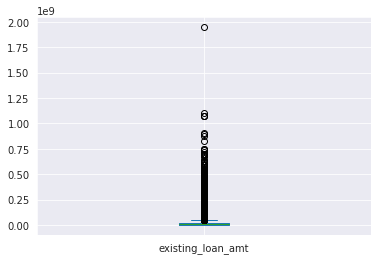

In [32]:
df_sub = user_spec[user_spec.existing_loan_cnt == 1]
df_sub.existing_loan_amt.plot(kind='box')
print('중앙값:', np.median(df_sub[(~df_sub.existing_loan_amt.isna())].existing_loan_amt))

In [89]:
user_spec['existing_loan_cnt'] = user_spec['existing_loan_cnt'].fillna(0)

In [90]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,ymd
0,1031304,1,2000.0,1.0,2022-05-03 14:51:00,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,0.0,생활비,0.0,-1.0,1.0,NaN,2022-05-03
1,1767402,1,2000.0,1.0,2022-05-03 14:53:33,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,0.0,-1.0,1.0,NaN,2022-05-03
2,1096882,7,1985.0,1.0,2022-05-22 16:42:47,580.0,22000000.0,EARNEDINCOME2,201907.0,계약직,기타가족소유,10000000.0,생활비,0.0,-1.0,7.0,46000000.0,2022-05-22
3,248576,9,1996.0,1.0,2022-05-21 23:41:09,810.0,29000000.0,EARNEDINCOME,202201.0,계약직,기타가족소유,15000000.0,사업자금,0.0,-1.0,1.0,NaN,2022-05-21
4,1180616,11,1997.0,1.0,2022-03-24 10:58:22,640.0,25000000.0,EARNEDINCOME,202106.0,정규직,기타가족소유,2000000.0,생활비,0.0,-1.0,1.0,14000000.0,2022-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1889786,879694,1991.0,0.0,2022-03-31 20:17:31,NaN,39000000.0,EARNEDINCOME,201909.0,정규직,전월세,10000000.0,생활비,0.0,-1.0,0.0,NaN,2022-03-31
1394212,1774704,879695,1996.0,1.0,2022-05-27 12:50:55,NaN,30000000.0,EARNEDINCOME2,202202.0,정규직,전월세,15000000.0,대환대출,0.0,-1.0,0.0,NaN,2022-05-27
1394213,2149910,879696,1997.0,1.0,2022-03-14 05:23:30,610.0,37000000.0,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,0.0,-1.0,3.0,20000000.0,2022-03-14
1394214,1856758,879696,1997.0,1.0,2022-03-14 05:40:38,610.0,37000000.0,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,0.0,-1.0,3.0,20000000.0,2022-03-14


In [91]:
user_spec['existing_loan_amt'] = user_spec['existing_loan_amt'].fillna('None')
col_list = []

for i in range(len(user_spec)):
  existing_loan_cnt = user_spec.existing_loan_cnt.iloc[i]
  existing_loan_amt = user_spec.existing_loan_amt.iloc[i]
  
  if existing_loan_amt == 'None':

    if existing_loan_cnt == 0:
      col_list.append(0)

    elif existing_loan_cnt == 1:
      col_list.append(10000000)

  else:
    col_list.append(existing_loan_amt)

user_spec['existing_loan_amt'] = col_list

In [92]:
user_spec.isna().sum()

application_id                              0
user_id                                     0
birth_year                               9723
gender                                   9723
insert_time                                 0
credit_score                           105114
yearly_income                               0
income_type                                 0
company_enter_month                    134851
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                           0
existing_loan_amt                           0
ymd                                         0
dtype: int64

In [93]:
#user_spec.to_csv('user_spec_fillna.csv', index=False)